In [609]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

In [666]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve # Importing roc_curve
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#Exploratory Data Analysis (EDA):

In [611]:
df=pd.read_csv('/content/drive/MyDrive/dataset_traffic_accident_prediction1 2.csv')

In [612]:
df.head()#displaying the first 5 row of the dataset

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [613]:
print("Shape:",df.shape)

Shape: (840, 14)


In [615]:
print("Data types:\n", df.dtypes)

Data types:
 Weather                  object
Road_Type                object
Time_of_Day              object
Traffic_Density         float64
Speed_Limit             float64
Number_of_Vehicles      float64
Driver_Alcohol          float64
Accident_Severity        object
Road_Condition           object
Vehicle_Type             object
Driver_Age              float64
Driver_Experience       float64
Road_Light_Condition     object
Accident                float64
dtype: object


In [616]:
df.describe(include='all') #displaying the descriptive statistics of the dataset

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
count,798,798,798,798.000000,798.000000,798.000000,798.000000,798,798,798,798.000000,798.000000,798,798.000000
unique,5,4,4,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,3,NaN
top,Clear,Highway,Afternoon,NaN,NaN,NaN,NaN,Low,Dry,Car,NaN,NaN,Artificial Light,NaN
freq,334,402,272,NaN,NaN,NaN,NaN,478,400,589,NaN,NaN,402,NaN
mean,NaN,NaN,NaN,1.001253,71.050125,3.286967,0.160401,NaN,NaN,NaN,43.259398,38.981203,NaN,0.299499
std,NaN,NaN,NaN,0.784894,32.052458,2.017267,0.367208,NaN,NaN,NaN,15.129856,15.273201,NaN,0.458326
min,NaN,NaN,NaN,0.000000,30.000000,1.000000,0.000000,NaN,NaN,NaN,18.000000,9.000000,NaN,0.000000
25%,NaN,NaN,NaN,0.000000,50.000000,2.000000,0.000000,NaN,NaN,NaN,30.000000,26.000000,NaN,0.000000
50%,NaN,NaN,NaN,1.000000,60.000000,3.000000,0.000000,NaN,NaN,NaN,43.000000,39.000000,NaN,0.000000
75%,NaN,NaN,NaN,2.000000,80.000000,4.000000,0.000000,NaN,NaN,NaN,56.000000,52.750000,NaN,1.000000


In [617]:
print("Missing values:\n",df.isnull().sum()) #counting the missing values in each column of the dataset

Missing values:
 Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64


#Univariate Analysis


Numerical variables

In [618]:
#filling missing values in numercial columns with their respective mean or median values
df["Driver_Age"].fillna(df["Driver_Age"].mean(), inplace=True)
df["Driver_Experience"].fillna(df["Driver_Experience"].mean(), inplace=True)
df["Number_of_Vehicles"].fillna(df["Number_of_Vehicles"].median(), inplace=True)
df["Speed_Limit"].fillna(df["Speed_Limit"].median(), inplace=True)
df["Accident"].fillna(df["Accident"].median(), inplace=True)

<ipython-input-618-99a85d2c29c3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Driver_Age"].fillna(df["Driver_Age"].mean(), inplace=True)
<ipython-input-618-99a85d2c29c3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Categorical Data

In [619]:
# Filling missing values in categorical columns with their respective mode values
df['Weather'].fillna(value = df['Weather'].mode()[0], inplace=True)
df['Road_Type'].fillna(value = df['Road_Type'].mode()[0], inplace=True)
df['Time_of_Day'].fillna(value = df['Time_of_Day'].mode()[0], inplace=True)
df['Traffic_Density'].fillna(value = df['Traffic_Density'].mode()[0], inplace=True)
df['Driver_Alcohol'].fillna(value = df['Driver_Alcohol'].mode()[0], inplace=True)
df['Accident_Severity'].fillna(value = df['Accident_Severity'].mode()[0], inplace=True)
df['Road_Condition'].fillna(value = df['Road_Condition'].mode()[0], inplace=True)
df['Vehicle_Type'].fillna(value = df['Vehicle_Type'].mode()[0], inplace=True)
df['Road_Light_Condition'].fillna(value = df['Road_Light_Condition'].mode()[0], inplace=True)

<ipython-input-619-07d610d6e74d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather'].fillna(value = df['Weather'].mode()[0], inplace=True)
<ipython-input-619-07d610d6e74d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [620]:
df.head(10)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,Low,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,1.0,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
5,Clear,Rural Road,Night,0.0,120.0,3.0,0.0,Moderate,Dry,Truck,49.0,43.0,Artificial Light,0.0
6,Foggy,Highway,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Truck,27.0,26.0,Daylight,1.0
7,Rainy,City Road,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Car,29.0,22.0,Artificial Light,1.0
8,Stormy,Highway,Morning,1.0,60.0,2.0,0.0,High,Icy,Car,38.0,29.0,Artificial Light,0.0
9,Rainy,City Road,Afternoon,2.0,30.0,2.0,0.0,Low,Dry,Truck,50.0,48.0,Artificial Light,0.0


In [621]:
df.isnull().sum()

,0
Weather,0
Road_Type,0
Time_of_Day,0
Traffic_Density,0
Speed_Limit,0
Number_of_Vehicles,0
Driver_Alcohol,0
Accident_Severity,0
Road_Condition,0
Vehicle_Type,0


In [622]:
df['Accident_Severity'] = df['Accident_Severity'].replace({'Moderate': 0, 'Low': 1, 'High': 2})

<ipython-input-622-4a09211c5af3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Accident_Severity'] = df['Accident_Severity'].replace({'Moderate': 0, 'Low': 1, 'High': 2})


In [623]:
hot_encoding = pd.get_dummies(df[['Weather', 'Road_Type', 'Time_of_Day', 'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition']]).astype(int)

#droping the  original columns
df=df.drop(['Weather','Road_Type','Time_of_Day','Road_Condition','Vehicle_Type','Road_Light_Condition'], axis=1, errors='ignore')

#concatenate the original dataframe with the encoded columns
df=pd.concat([df,hot_encoding],axis=1)

In [624]:
df.columns

Index(['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles',
       'Driver_Alcohol', 'Accident_Severity', 'Driver_Age',
       'Driver_Experience', 'Accident', 'Weather_Clear', 'Weather_Foggy',
       'Weather_Rainy', 'Weather_Snowy', 'Weather_Stormy',
       'Road_Type_City Road', 'Road_Type_Highway', 'Road_Type_Mountain Road',
       'Road_Type_Rural Road', 'Time_of_Day_Afternoon', 'Time_of_Day_Evening',
       'Time_of_Day_Morning', 'Time_of_Day_Night', 'Road_Condition_Dry',
       'Road_Condition_Icy', 'Road_Condition_Under Construction',
       'Road_Condition_Wet', 'Vehicle_Type_Bus', 'Vehicle_Type_Car',
       'Vehicle_Type_Motorcycle', 'Vehicle_Type_Truck',
       'Road_Light_Condition_Artificial Light',
       'Road_Light_Condition_Daylight', 'Road_Light_Condition_No Light'],
      dtype='object')

In [625]:
df.dtypes#to check the datatype

,0
Traffic_Density,float64
Speed_Limit,float64
Number_of_Vehicles,float64
Driver_Alcohol,float64
Accident_Severity,int64
Driver_Age,float64
Driver_Experience,float64
Accident,float64
Weather_Clear,int64
Weather_Foggy,int64


In [626]:
print("Shape:",df.shape) #number of rows and columns

Shape: (840, 32)


In [627]:
df.info() #data types, non-nulls counts, and memory usage of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Traffic_Density                        840 non-null    float64
 1   Speed_Limit                            840 non-null    float64
 2   Number_of_Vehicles                     840 non-null    float64
 3   Driver_Alcohol                         840 non-null    float64
 4   Accident_Severity                      840 non-null    int64  
 5   Driver_Age                             840 non-null    float64
 6   Driver_Experience                      840 non-null    float64
 7   Accident                               840 non-null    float64
 8   Weather_Clear                          840 non-null    int64  
 9   Weather_Foggy                          840 non-null    int64  
 10  Weather_Rainy                          840 non-null    int64  
 11  Weathe

#Multivariate Analysis

<ipython-input-628-fd6a17831111>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Accident"], palette="viridis")


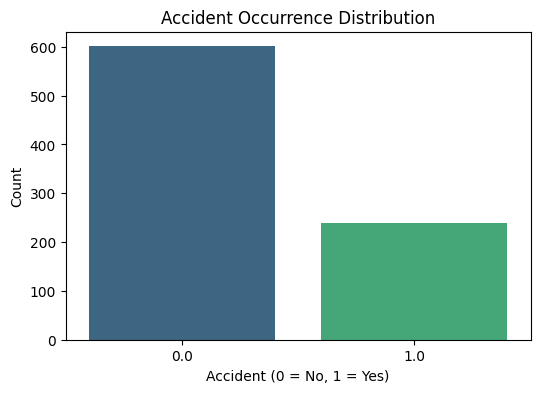

In [628]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Accident"], palette="viridis")
plt.title("Accident Occurrence Distribution")
plt.xlabel("Accident (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

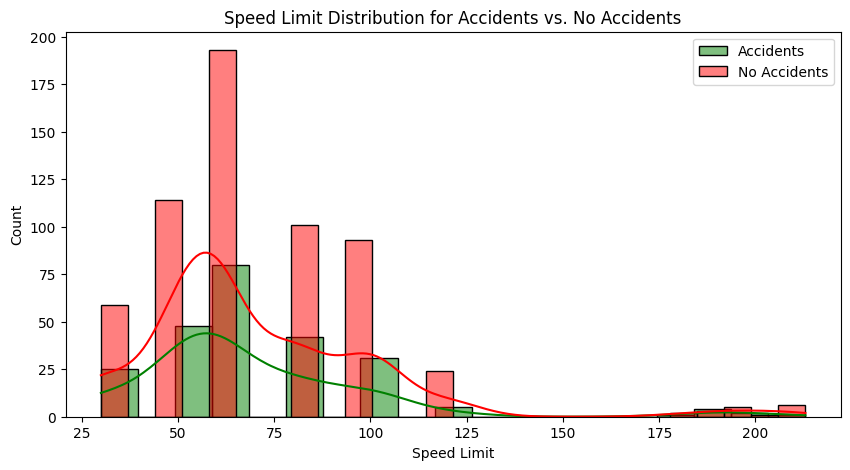

In [629]:
plt.figure(figsize=(10,5))
sns.histplot(df[df["Accident"]==1]["Speed_Limit"], color="green", label="Accidents", kde=True)
sns.histplot(df[df["Accident"]==0]["Speed_Limit"], color="red", label="No Accidents", kde=True)
plt.legend()
plt.title("Speed Limit Distribution for Accidents vs. No Accidents")
plt.xlabel("Speed Limit")
plt.show()

<ipython-input-630-ff44354ec3e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Accident", y="Number_of_Vehicles", data=df, palette="viridis")


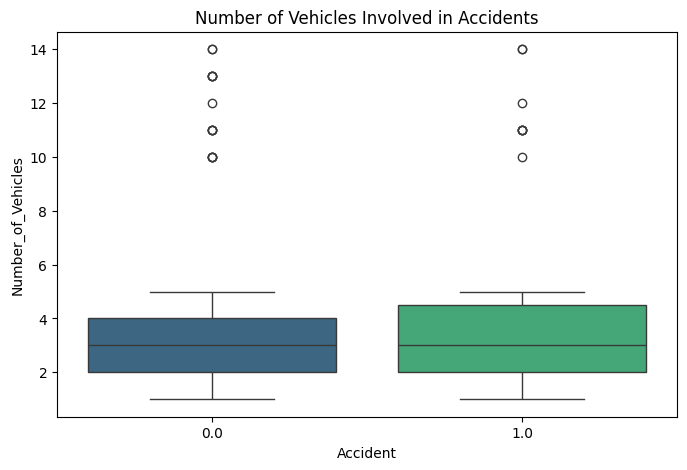

In [630]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Accident", y="Number_of_Vehicles", data=df, palette="viridis")
plt.title("Number of Vehicles Involved in Accidents")
plt.show()

#Finding Outliers

In [631]:
# Calculate IQR
Q1 = df['Number_of_Vehicles'].quantile(0.25)
Q3 = df['Number_of_Vehicles'].quantile(0.75)
IQR = Q3 - Q1

In [632]:
# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [633]:
# Find outliers
outliers = df[(df['Number_of_Vehicles'] < lower_bound) | (df['Number_of_Vehicles'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")

Number of Outliers: 23


#Handle Outliers

In [634]:
# Remove rows with outliers
df_cleaned = df[(df['Number_of_Vehicles'] >= lower_bound) & (df['Number_of_Vehicles'] <= upper_bound)]

In [636]:
# Cap outliers to lower and upper bounds
df['Number_of_Vehicles'] = df['Number_of_Vehicles'].clip(lower=lower_bound, upper=upper_bound)

<ipython-input-637-6414789ea07d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Accident", y="Number_of_Vehicles", data=df, palette="viridis")


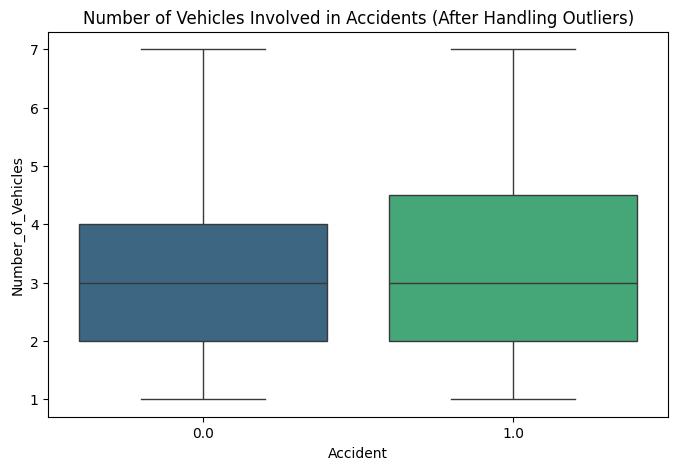

In [637]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Accident", y="Number_of_Vehicles", data=df, palette="viridis")
plt.title("Number of Vehicles Involved in Accidents (After Handling Outliers)")
plt.show()


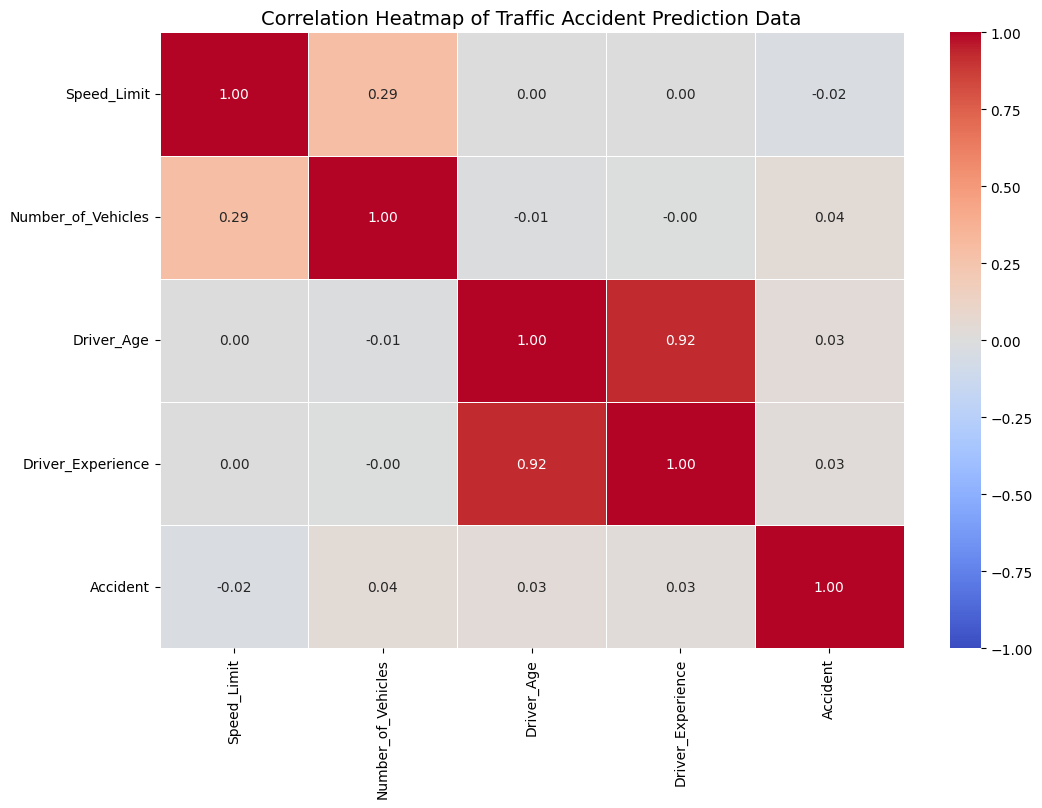

In [638]:
cormat = df[['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience', 'Accident',]].corr()

# Plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cormat, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Traffic Accident Prediction Data", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


Corrleation Matrix

In [639]:
df.corr()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Driver_Age,Driver_Experience,Accident,Weather_Clear,Weather_Foggy,...,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet,Vehicle_Type_Bus,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Truck,Road_Light_Condition_Artificial Light,Road_Light_Condition_Daylight,Road_Light_Condition_No Light
Traffic_Density,1.000000,-0.041794,-0.037852,-0.022324,-0.010111,-0.010249,-0.002397,0.005920,0.036176,-0.065981,...,0.007311,-0.025593,0.023471,0.065158,-0.006307,-0.026208,-0.000569,-0.032842,0.037256,-0.005919
Speed_Limit,-0.041794,1.000000,0.294933,-0.017105,-0.039449,0.003665,0.000360,-0.024430,-0.001078,-0.006528,...,0.067731,0.030301,0.002154,0.020094,-0.032009,-0.000476,0.032982,0.099392,-0.072433,-0.050337
Number_of_Vehicles,-0.037852,0.294933,1.000000,-0.027372,-0.036678,-0.010336,-0.004428,0.042338,0.010122,0.006519,...,0.055872,-0.007729,0.029340,-0.011672,-0.039159,0.012452,0.046827,0.023373,-0.007773,-0.027514
Driver_Alcohol,-0.022324,-0.017105,-0.027372,1.000000,-0.007425,0.022964,0.023894,0.011607,-0.001967,-0.012963,...,-0.003995,0.022737,-0.019862,0.006817,-0.008830,-0.001145,0.009393,0.048726,-0.018839,-0.052898
Accident_Severity,-0.010111,-0.039449,-0.036678,-0.007425,1.000000,-0.065593,-0.066854,-0.040084,-0.075484,0.009962,...,0.061396,-0.074803,-0.007854,0.007661,0.026737,-0.042962,0.000585,0.022895,-0.026282,0.004651
Driver_Age,-0.010249,0.003665,-0.010336,0.022964,-0.065593,1.000000,0.924461,0.032287,-0.025892,0.005156,...,-0.001953,0.074253,0.022785,-0.016469,0.002171,0.014445,-0.007983,-0.060597,0.034536,0.046982
Driver_Experience,-0.002397,0.000360,-0.004428,0.023894,-0.066854,0.924461,1.000000,0.029666,-0.027392,0.001171,...,0.022079,0.092574,0.003472,-0.023337,0.007644,0.035763,-0.031815,-0.044905,0.017926,0.047794
Accident,0.005920,-0.024430,0.042338,0.011607,-0.040084,0.032287,0.029666,1.000000,0.058470,-0.019342,...,0.001250,-0.050017,-0.078837,0.018553,-0.052088,0.004621,0.055908,-0.007022,0.005175,0.003460
Weather_Clear,0.036176,-0.001078,0.010122,-0.001967,-0.075484,-0.025892,-0.027392,0.058470,1.000000,-0.343934,...,-0.011962,-0.013352,0.009393,0.003695,-0.052319,0.019781,0.049642,0.015622,-0.015964,-0.000159
Weather_Foggy,-0.065981,-0.006528,0.006519,-0.012963,0.009962,0.005156,0.001171,-0.019342,-0.343934,1.000000,...,0.040450,-0.006798,0.023228,-0.001225,0.013402,0.000533,-0.017837,-0.025445,0.023809,0.003971


#Summary Statistics

In [640]:
df.describe() #generating descriptive of the dataset

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Driver_Age,Driver_Experience,Accident,Weather_Clear,Weather_Foggy,...,Road_Condition_Icy,Road_Condition_Under Construction,Road_Condition_Wet,Vehicle_Type_Bus,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_Truck,Road_Light_Condition_Artificial Light,Road_Light_Condition_Daylight,Road_Light_Condition_No Light
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,...,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,1.001190,70.497619,3.142857,0.152381,0.807143,43.259398,38.981203,0.284524,0.447619,0.127381,...,0.183333,0.108333,0.182143,0.028571,0.751190,0.102381,0.117857,0.528571,0.380952,0.090476
std,0.764996,31.332695,1.487676,0.359604,0.586659,14.746297,14.886008,0.451456,0.497545,0.333598,...,0.387170,0.310986,0.386192,0.166698,0.432581,0.303329,0.322631,0.499480,0.485910,0.287034
min,0.000000,30.000000,1.000000,0.000000,0.000000,18.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,0.000000,31.000000,26.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,1.000000,43.259398,38.981203,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,1.000000,55.000000,52.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2.000000,213.000000,7.000000,1.000000,2.000000,69.000000,69.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Variability

In [641]:
print("Variance:\n",df.var()) #calculating the variance of each column in the dataset

Variance:
 Traffic_Density                            0.585219
Speed_Limit                              981.737777
Number_of_Vehicles                         2.213179
Driver_Alcohol                             0.129315
Accident_Severity                          0.344168
Driver_Age                               217.453283
Driver_Experience                        221.593228
Accident                                   0.203813
Weather_Clear                              0.247551
Weather_Foggy                              0.111288
Weather_Rainy                              0.199075
Weather_Snowy                              0.092955
Weather_Stormy                             0.045406
Road_Type_City Road                        0.199075
Road_Type_Highway                          0.249481
Road_Type_Mountain Road                    0.046482
Road_Type_Rural Road                       0.126816
Time_of_Day_Afternoon                      0.234355
Time_of_Day_Evening                        0.192400
T

In [642]:
# Minimum and Maximum
print("Minimum:\n", df.min())

Minimum:
 Traffic_Density                           0.0
Speed_Limit                              30.0
Number_of_Vehicles                        1.0
Driver_Alcohol                            0.0
Accident_Severity                         0.0
Driver_Age                               18.0
Driver_Experience                         9.0
Accident                                  0.0
Weather_Clear                             0.0
Weather_Foggy                             0.0
Weather_Rainy                             0.0
Weather_Snowy                             0.0
Weather_Stormy                            0.0
Road_Type_City Road                       0.0
Road_Type_Highway                         0.0
Road_Type_Mountain Road                   0.0
Road_Type_Rural Road                      0.0
Time_of_Day_Afternoon                     0.0
Time_of_Day_Evening                       0.0
Time_of_Day_Morning                       0.0
Time_of_Day_Night                         0.0
Road_Condition_Dry      

In [643]:
print("Maximum:\n", df.max())

Maximum:
 Traffic_Density                            2.0
Speed_Limit                              213.0
Number_of_Vehicles                         7.0
Driver_Alcohol                             1.0
Accident_Severity                          2.0
Driver_Age                                69.0
Driver_Experience                         69.0
Accident                                   1.0
Weather_Clear                              1.0
Weather_Foggy                              1.0
Weather_Rainy                              1.0
Weather_Snowy                              1.0
Weather_Stormy                             1.0
Road_Type_City Road                        1.0
Road_Type_Highway                          1.0
Road_Type_Mountain Road                    1.0
Road_Type_Rural Road                       1.0
Time_of_Day_Afternoon                      1.0
Time_of_Day_Evening                        1.0
Time_of_Day_Morning                        1.0
Time_of_Day_Night                          1.0
Roa

#Build Model from Scratch

### **Data Preprocessing and Feature Normalization**:

In [644]:
X = df.drop('Accident', axis=1) #dropping 'Accident' from the dataframe
y = df['Accident'] #extracting the 'Accident' column from the dataframe and assigning it to variable 'y'

In [645]:
#Splitting the dataset into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [646]:
# Standardize features
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train)
X_test_class = scaler.transform(X_test)

### **Logistic Regression Functions:**

In [647]:
def logistic_function(x):
    """Computes the sigmoid function.
    The sigmoid function converts a linear equation into a probability value between 0 and 1.
    """
    return 1 / (1 + np.exp(-x))

def log_loss(y_true, y_pred):
    """Computes log loss to evaluate model performance."""
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # Prevent log(0) errors
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def cost_function(y_true, y_pred):
    """Computes the average log loss."""
    return np.mean(log_loss(y_true, y_pred))

In [648]:
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.

    Args:
      X (ndarray, shape (m,n)): Data on features, m observations with n features.
      y (array_like, shape (m,)): Array of true values of target (0 or 1).
      w (array_like, shape (n,)): Weight parameters of the model.
      b (float): Bias parameter of the model.

    Returns:
      cost (float): Nonnegative cost corresponding to y and y_pred.
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match."
    assert len(w) == n, "Number of features and number of weight parameters do not match."

    # Compute z using np.dot
    z = np.dot(X, w) + b

    # Compute predictions using logistic function (sigmoid)
    y_pred = 1 / (1 + np.exp(-z))

    # Compute the cost using the log loss function
    cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    return cost


In [649]:
def compute_gradient(X, y, w, b):
    """Computes gradients for weight updates."""
    n, d = X.shape
    y_pred = logistic_function(np.dot(X, w) + b)
    error = y_pred - y

    grad_w = np.dot(X.T, error) / n  # Weight gradient
    grad_b = np.sum(error) / n  # Bias gradient

    return grad_w, grad_b

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False):
    """Implements gradient descent to optimize logistic regression parameters."""
    cost_history = []

    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b
        cost = cost_function(y, logistic_function(np.dot(X, w) + b))
        cost_history.append(cost)

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return w, b, cost_history


In [650]:
def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.

    Arguments:
      X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d features.
      w (ndarray, shape (d,)): Array of weights learned via gradient descent.
      b (float): Bias learned via gradient descent.
      threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.

    Returns:
      y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
    """
    # Compute predicted probabilities using sigmoid function
    y_test_prob = logistic_function(np.dot(X, w) + b)

    # Apply threshold to convert probabilities to binary predictions (0 or 1)
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred


Train the Model

In [651]:
# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0
alpha = 0.07  # Learning rate
n_iter = 1000  # Number of iterations

# Train the model
print("\nTraining Logistic Regression Model:")
w, b, cost_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True)



Training Logistic Regression Model:
Iteration 0: Cost = 0.688869
Iteration 100: Cost = 0.575133
Iteration 200: Cost = 0.569144
Iteration 300: Cost = 0.568454
Iteration 400: Cost = 0.568273
Iteration 500: Cost = 0.568178
Iteration 600: Cost = 0.568109
Iteration 700: Cost = 0.568055
Iteration 800: Cost = 0.568011
Iteration 900: Cost = 0.567974
Iteration 999: Cost = 0.567944


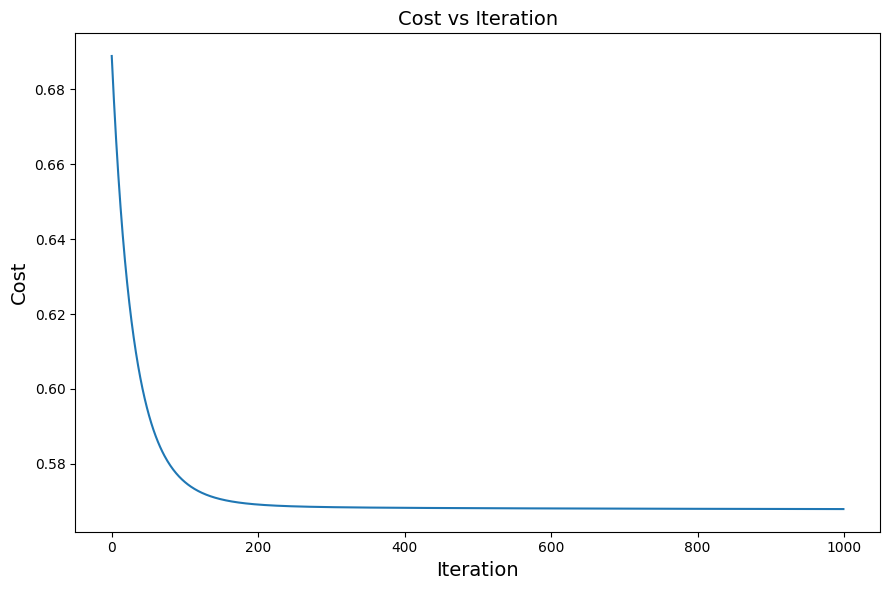

In [652]:
# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

In [653]:
# Evaluation Function: Computes confusion matrix, precision, recall, and F1-score
def evaluate_classification(y_true, y_pred):

    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    # Precision, recall, and F1-score with safe handling of zero division
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall =  TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score =  (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Ensure metrics are floats
    precision = float(precision)
    recall = float(recall)
    f1_score = float(f1_score)

    # Return metrics as a dictionary
    return confusion_matrix, precision, recall, f1_score

In [654]:
# Test model on train and test data
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)

# Compute cost (log loss) on train and test sets
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)

print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.5679
Test Loss (Cost): 0.6294


In [655]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Test Accuracy: 69.64%

Confusion Matrix:
[[115   2]
 [ 49   2]]
Precision: 0.50
Recall: 0.04
F1-Score: 0.07


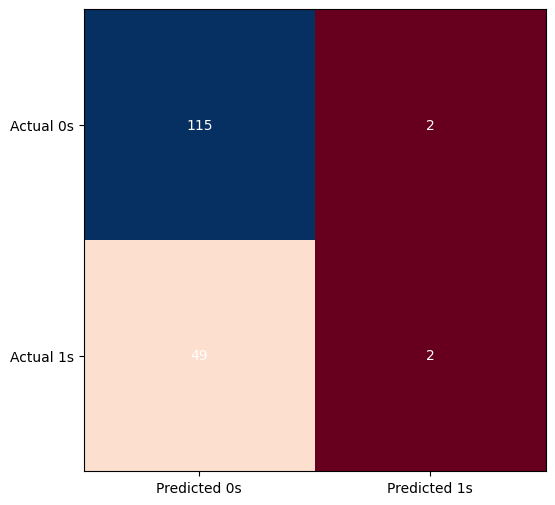

In [656]:
# Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.imshow(confusion_matrix, cmap='RdBu')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')
plt.show()

### **Split the dataset into training and testing sets.**

In [657]:
X = df.drop('Accident', axis=1) #dropping 'Accident' from the dataframe
y = df['Accident'] #extracting the 'Accident' column from the dataframe and assigning it to variable 'y'

In [658]:
#Splitting the dataset into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [659]:
# Standardize features
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train)
X_test_class = scaler.transform(X_test)

### **Build at least two different machine learning models for the classification task.**

#### **Model 1: Random Forest**




In [660]:
# Initialize the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train_class, y_train_class)

# Make predictions
y_pred_rf = rf_clf.predict(X_test_class)

#### **Model 2: KNN Classifier**

In [661]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_clf = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_clf.fit(X_train_class, y_train_class)

# Make predictions
y_pred_knn = knn_clf.predict(X_test_class)


In [662]:
# Random Forest Evaluation
rf_acc = accuracy_score(y_test_class, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)
print("\nRandom Forest Classification Report:\n", classification_report(y_test_class, y_pred_rf))

Random Forest Accuracy: 0.6964285714285714

Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.97      0.82       117
         1.0       0.50      0.08      0.14        51

    accuracy                           0.70       168
   macro avg       0.60      0.52      0.48       168
weighted avg       0.64      0.70      0.61       168



In [663]:
# K-Nearest Neighbors (KNN) Evaluation
knn_acc = accuracy_score(y_test_class, y_pred_knn)
print("K-Nearest Neighbors (KNN) Accuracy:", knn_acc)
print("\nKNN Classification Report:\n", classification_report(y_test_class, y_pred_knn))

K-Nearest Neighbors (KNN) Accuracy: 0.6488095238095238

KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.84      0.77       117
         1.0       0.37      0.22      0.27        51

    accuracy                           0.65       168
   macro avg       0.54      0.53      0.52       168
weighted avg       0.61      0.65      0.62       168



In [664]:
# Convert to NumPy arrays
y_test_class = np.array(y_test_class)
y_pred_log_reg = np.array(y_pred_log_reg)  # Ensure predictions are also numpy.ndarray


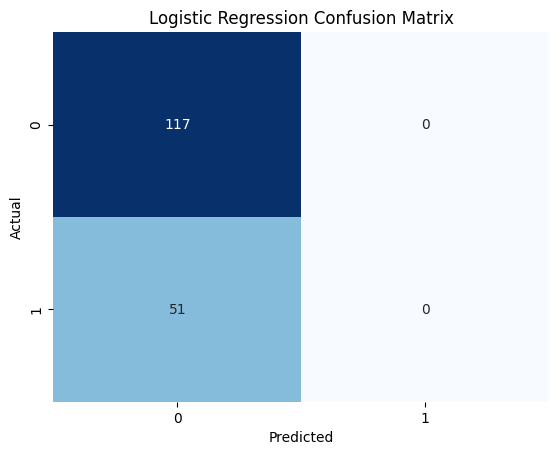

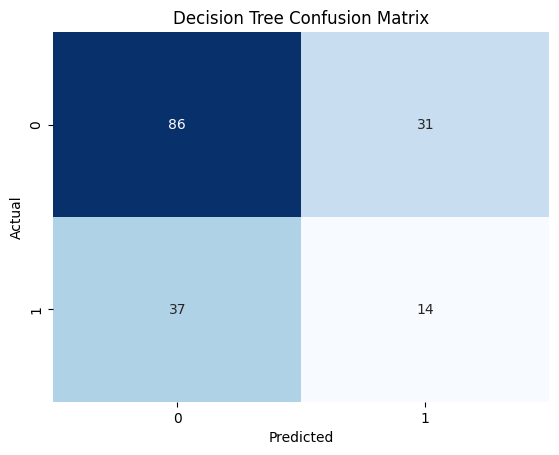

In [667]:
cm_log_reg = confusion_matrix(y_test_class, y_pred_log_reg)
cm_tree = confusion_matrix(y_test_class, y_pred_tree)

# Plot confusion matrix for Logistic Regression
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for Decision Tree
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


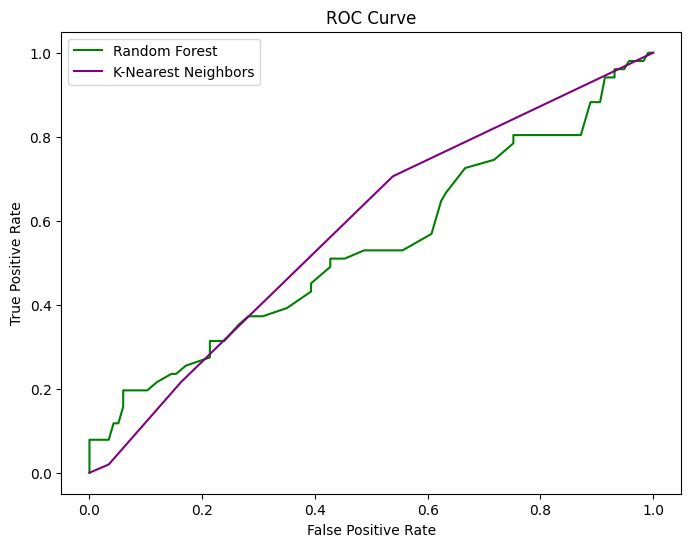

In [668]:
# Get predicted probabilities
y_pred_prob_rf = rf_clf.predict_proba(X_test_class)[:, 1]
y_pred_prob_knn = knn_clf.predict_proba(X_test_class)[:, 1]

# Compute ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test_class, y_pred_prob_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test_class, y_pred_prob_knn)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest", color="green")
plt.plot(fpr_knn, tpr_knn, label="K-Nearest Neighbors", color="purple")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## **Hyper-parameter Optimization with CrossValidation:**

In [ ]:
# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for Random Forest
rf_clf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_class, y_train_class)

# Best hyperparameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)


In [ ]:
# Convert GridSearchCV results to DataFrame
rf_results = pd.DataFrame(grid_search_rf.cv_results_)
knn_results = pd.DataFrame(grid_search_knn.cv_results_)

# Plot heatmap for Random Forest hyperparameters
plt.figure(figsize=(10, 6))
pivot_rf = rf_results.pivot_table(values='mean_test_score', index='param_max_depth', columns='param_n_estimators')
sns.heatmap(pivot_rf, annot=True, cmap="viridis")
plt.title("Random Forest Hyperparameter Tuning (Accuracy)")
plt.xlabel("Number of Estimators")
plt.ylabel("Max Depth")
plt.show()

In [ ]:
# Hyperparameter grid for K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform GridSearchCV for KNN
knn_clf = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_clf, param_grid_knn, cv=5, scoring='recall', n_jobs=-1)
grid_search_knn.fit(X_train_class, y_train_class)

# Best hyperparameters for KNN
best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for KNN:", best_params_knn)

In [ ]:
# Perform GridSearchCV for KNN with recall as the metric
grid_search_knn_recall = GridSearchCV(knn_clf, param_grid_knn, cv=5, scoring='recall', n_jobs=-1)
grid_search_knn_recall.fit(X_train_class, y_train_class)

# Convert results to DataFrame
knn_results_recall = pd.DataFrame(grid_search_knn_recall.cv_results_)

# Plot heatmap for KNN hyperparameters (Recall)
plt.figure(figsize=(10, 6))
pivot_knn_recall = knn_results_recall.pivot_table(values='mean_test_score', index='param_n_neighbors', columns='param_metric')
sns.heatmap(pivot_knn_recall, annot=True, cmap="magma")
plt.title("KNN Hyperparameter Tuning (Recall)")
plt.xlabel("Distance Metric")
plt.ylabel("Number of Neighbors")
plt.show()


## **Feature Selection:**

In [ ]:
from sklearn.feature_selection import RFE

# Initialize Random Forest with best hyperparameters from GridSearchCV
rf_clf = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'],
                                max_depth=best_params_rf['max_depth'],
                                min_samples_split=best_params_rf['min_samples_split'],
                                min_samples_leaf=best_params_rf['min_samples_leaf'],
                                random_state=42)

# Initialize RFE with the Random Forest model
rfe_rf = RFE(rf_clf, n_features_to_select=5)
rfe_rf.fit(X_train_class, y_train_class)

# Convert X_train_class back to DataFrame
X_train_class_df = pd.DataFrame(X_train_class, columns=X.columns)

# Get selected features for Random Forest
selected_features_rf = X_train_class_df.columns[rfe_rf.support_]
print("Selected Features for Random Forest:", selected_features_rf)

# Fit the Random Forest model with selected features
rf_clf.fit(X_train_class_df[selected_features_rf], y_train_class)


Selected Features for Random Forest: Index(['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles', 'Driver_Age',
       'Driver_Experience'],
      dtype='object')


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Initialize KNN with best hyperparameters from GridSearchCV
knn_clf = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'],
                               weights=best_params_knn['weights'],
                               metric=best_params_knn['metric'])

# Initialize RFE with a logistic regression model (since KNN doesn't support feature importance)
log_reg = LogisticRegression(max_iter=1000)
rfe_knn = RFE(log_reg, n_features_to_select=5)
rfe_knn.fit(X_train_class, y_train_class)

# Get selected features for KNN
selected_features_knn = X_train_class_df.columns[rfe_knn.support_]
print("Selected Features for KNN:", selected_features_knn)

# Fit the KNN model with selected features
knn_clf.fit(X_train_class_df[selected_features_knn], y_train_class)

Selected Features for KNN: Index(['Number_of_Vehicles', 'Driver_Age', 'Driver_Experience',
       'Weather_Rainy', 'Road_Condition_Dry'],
      dtype='object')


KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

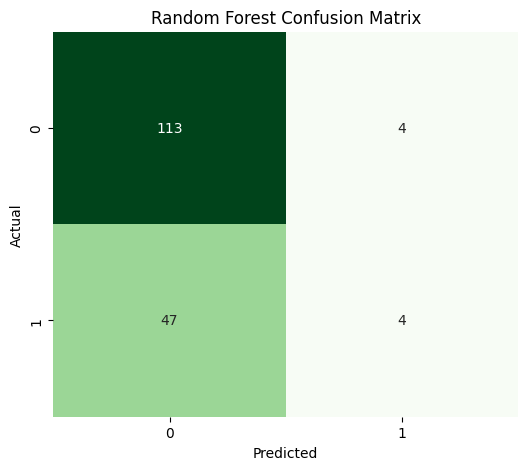

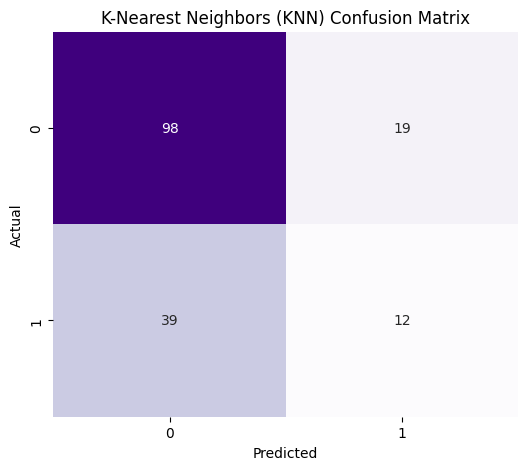

In [ ]:
# Compute confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test_class, y_pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute confusion matrix for KNN
cm_knn = confusion_matrix(y_test_class, y_pred_knn)

# Plot confusion matrix for KNN
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title('K-Nearest Neighbors (KNN) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


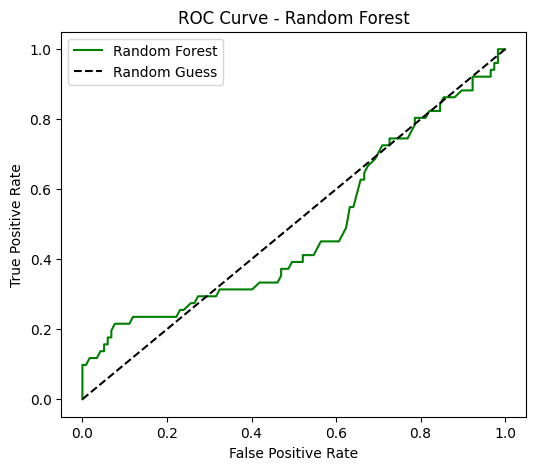

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC Curve for Random Forest
y_pred_prob_rf = rf_clf.predict_proba(X_test_class_df[selected_features_rf])[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_class, y_pred_prob_rf)

# Plot ROC Curve for Random Forest
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label="Random Forest", color="green")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-534-a22b2e2c8200>:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", linewidth=1, linestyle="--", color="gray")
<ipython-input-534-a22b2e2c8200>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", linewidth=1, linestyle="--", color="gray")


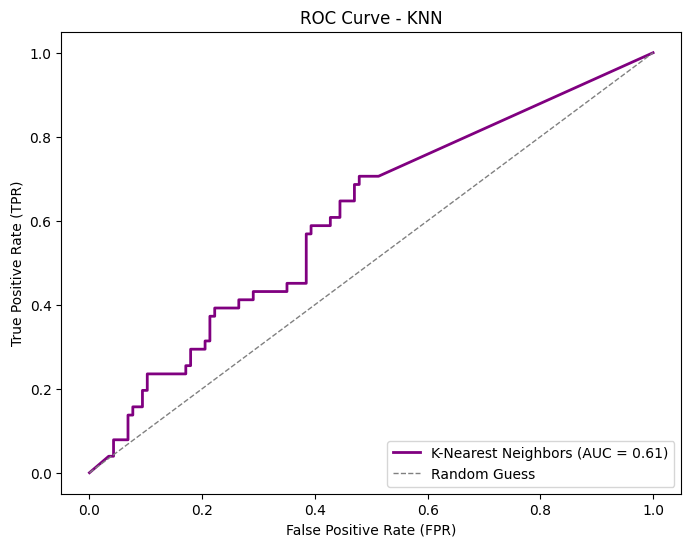

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC Curve for KNN
y_pred_prob_knn = best_knn.predict_proba(X_test_class)[:, 1]  # Ensure best_knn is used
fpr_knn, tpr_knn, _ = roc_curve(y_test_class, y_pred_prob_knn)

# Calculate AUC score for KNN
auc_knn = roc_auc_score(y_test_class, y_pred_prob_knn)

# Plot ROC Curve for KNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f"K-Nearest Neighbors (AUC = {auc_knn:.2f})", color="purple", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", linewidth=1, linestyle="--", color="gray")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
# plt.grid(alpha=0.3)
plt.show()


## **Final Model:**

In [ ]:
from sklearn.metrics import recall_score, classification_report

# Use best hyperparameters from GridSearchCV for KNN
best_knn_params = grid_search_knn.best_params_

knn_final = KNeighborsClassifier(n_neighbors=best_knn_params['n_neighbors'],
                                 weights=best_knn_params['weights'],
                                 metric=best_knn_params['metric'])

# Train KNN on selected features
knn_final.fit(X_train_class_df[selected_features_knn], y_train_class)

# Make predictions using the DataFrame
y_pred_knn = knn_final.predict(X_test_class_df[selected_features_knn])

# Evaluate the KNN model using Recall
knn_recall = recall_score(y_test_class, y_pred_knn)
print("KNN Final Model Recall:", knn_recall)
print("\nKNN Final Model Report:\n", classification_report(y_test_class, y_pred_knn))


KNN Final Model Recall: 0.29411764705882354

KNN Final Model Report:
               precision    recall  f1-score   support

         0.0       0.73      0.84      0.78       117
         1.0       0.44      0.29      0.35        51

    accuracy                           0.67       168
   macro avg       0.59      0.57      0.57       168
weighted avg       0.64      0.67      0.65       168



In [608]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, classification_report

# 2. Best Hyperparameters for Random Forest
best_rf_params = best_params_rf

# Initialize Random Forest model with best hyperparameters
# Removing 'criterion' from the parameters, as it's not in best_rf_params
random_forest_final = RandomForestClassifier(
    random_state=42,
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    # criterion=best_rf_params['criterion']  # Removed this line
)

# Train Random Forest on selected features
random_forest_final.fit(X_train_class[selected_features_rf], y_train_class)

# Make predictions with Random Forest
y_pred_rf_final = random_forest_final.predict(X_test_class_df[selected_features_rf])

# Evaluate Random Forest Model using Accuracy and Classification Report
rf_acc_final = accuracy_score(y_test_class, y_pred_rf_final)
print("Random Forest Final Model Accuracy:", rf_acc_final)
print("\nRandom Forest Final Model Report:\n", classification_report(y_test_class, y_pred_rf_final))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

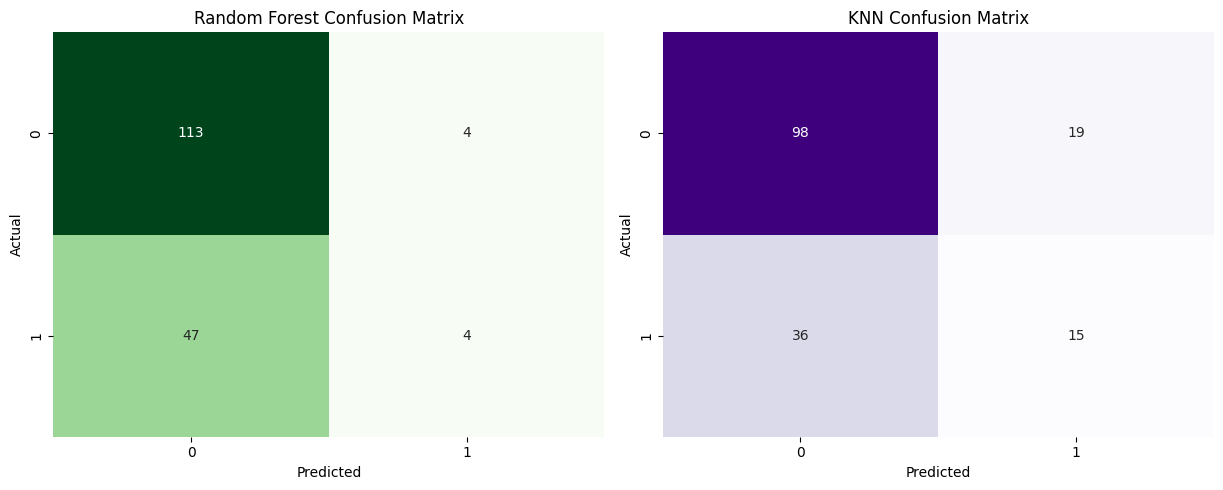

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrices
cm_rf = confusion_matrix(y_test_class, y_pred_rf)
cm_knn = confusion_matrix(y_test_class, y_pred_knn)

# Plot Confusion Matrices
plt.figure(figsize=(18, 5))

# Random Forest Confusion Matrix
plt.subplot(1, 3, 2)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# KNN Confusion Matrix
plt.subplot(1, 3, 3)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


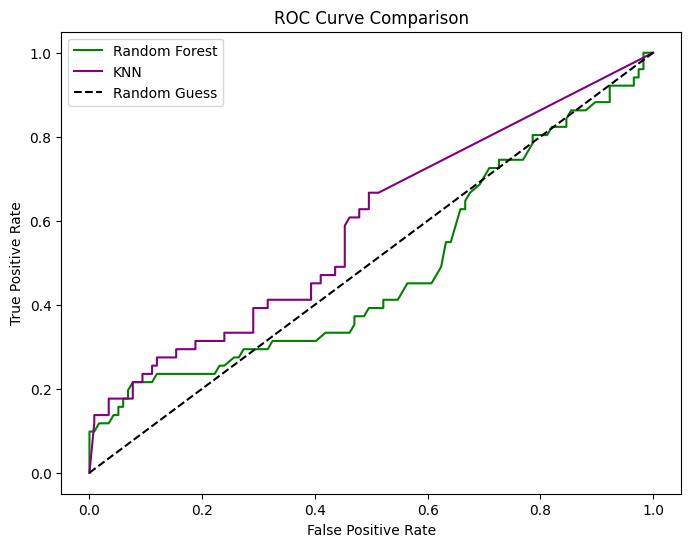

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test_class, y_pred_prob_log_reg)

# Get predicted probabilities for Random Forest
y_pred_prob_rf = rf_clf.predict_proba(X_test_class_df[selected_features_rf])[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_class, y_pred_prob_rf)

# Get predicted probabilities for KNN
y_pred_prob_knn = knn_clf.predict_proba(X_test_class_df[selected_features_knn])[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test_class, y_pred_prob_knn)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest", color="green")
plt.plot(fpr_knn, tpr_knn, label="KNN", color="purple")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
